In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Load the MNIST dataset

In [18]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [2 4 0 1 7 0 8 3 3 6]


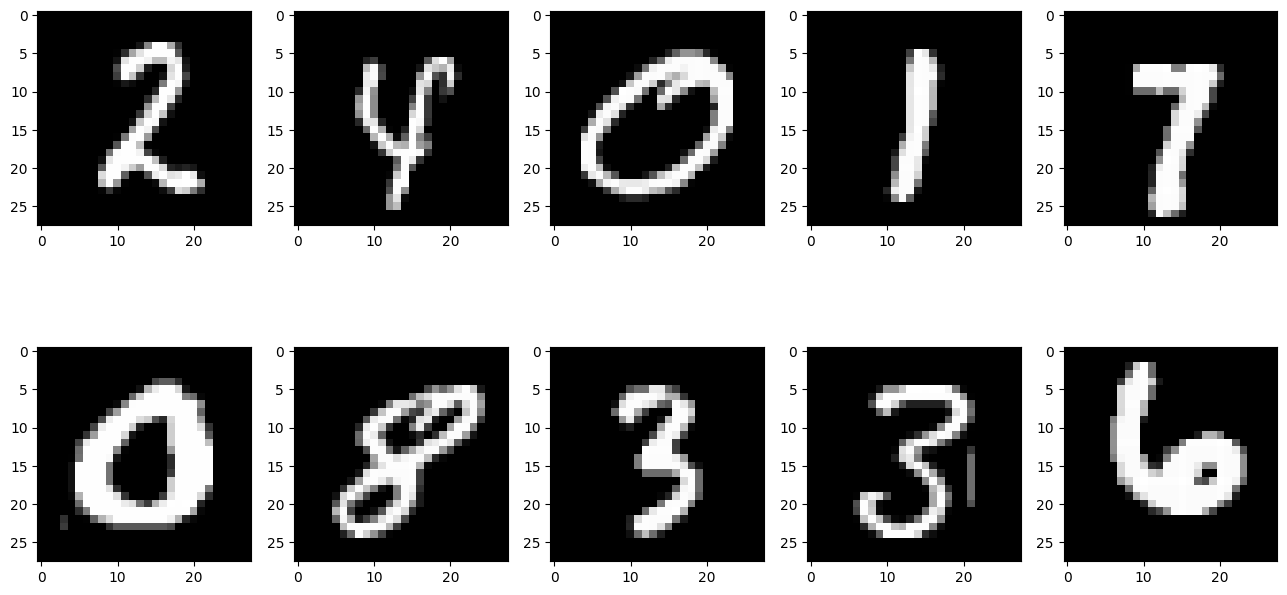

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [20]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [37]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='tanh'))
model.add(Dense(128,input_dim=128,activation='tanh'))
model.add(Dense(64,input_dim=128,activation='tanh'))
model.add(Dense(10,input_dim=64,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


Train the model

In [39]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2545 - accuracy: 0.9241
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1178 - accuracy: 0.9646
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0839 - accuracy: 0.9741
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0488 - accuracy: 0.9844
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0394 - accuracy: 0.9876
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0307 - accuracy: 0.9897
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - los

Plot the loss and accuracy graphs

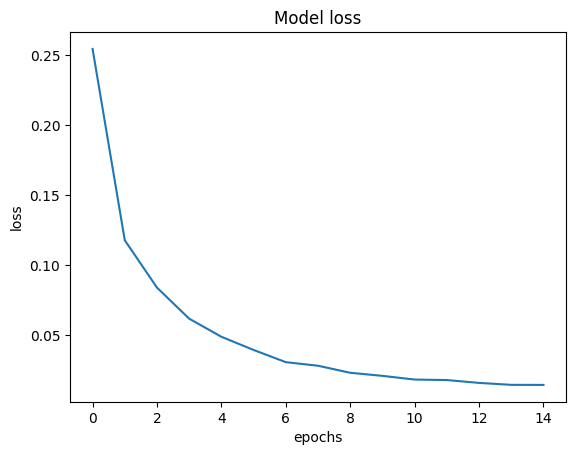

In [40]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

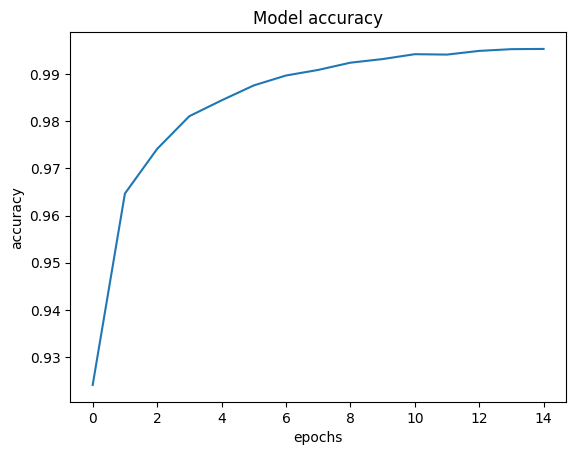

In [41]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [42]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9756
Loss of the Test dataset is: 0.10435888916254044
Accuracy of the test dataset is: 0.975600004196167


Save the model weights

In [43]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 2ms/step


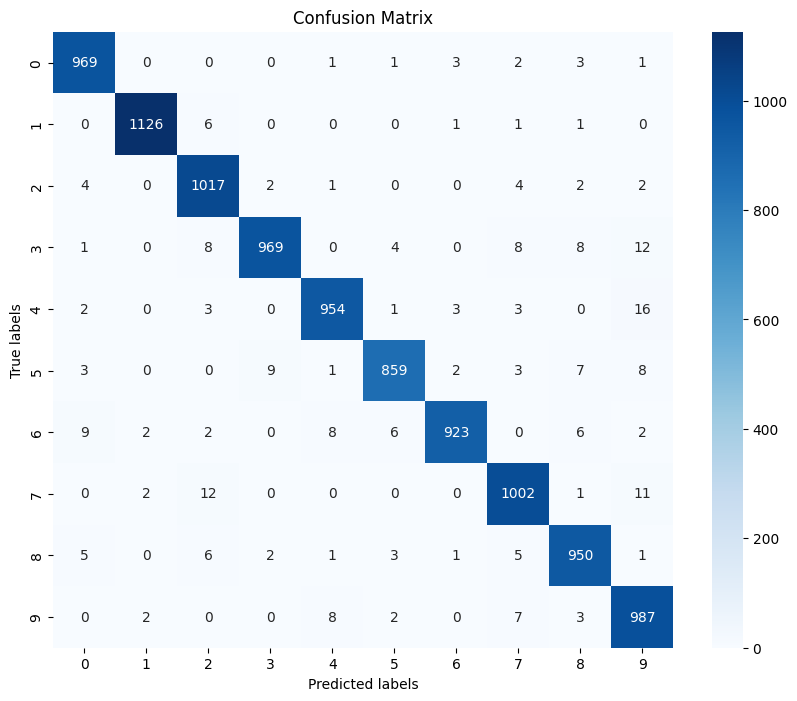

In [44]:
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)
confusion_mat = confusion_matrix(test_target, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()